In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

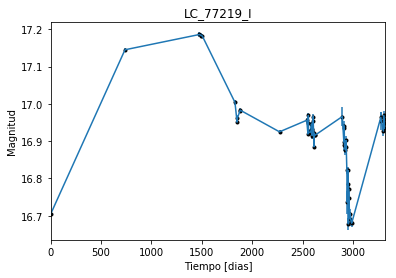

In [2]:
data = np.genfromtxt('LC_77219_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_77219_I')
plt.savefig("LC_77219_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

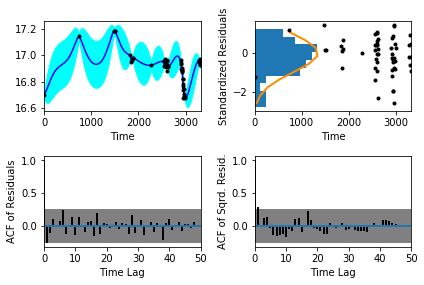

In [5]:
sample.assess_fit()

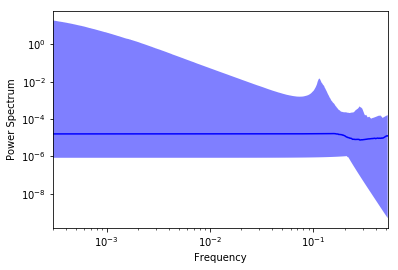

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

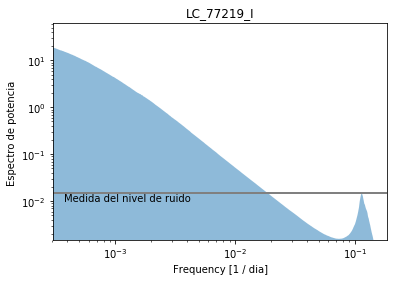

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_77219_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_77219_I')

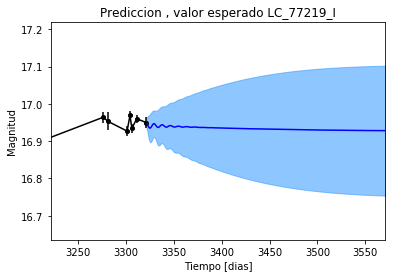

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_77219_I')

Text(0.5,1,'Prediccion, Caminos simulados LC_77219_I')

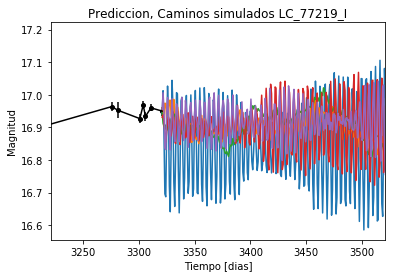

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_77219_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


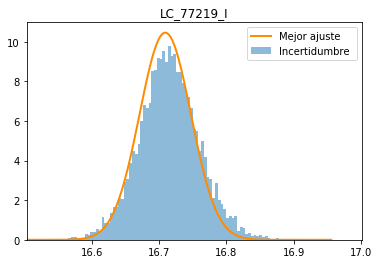

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_77219_I')
plt.savefig("Mejor_ajuste_LC_77219_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_77219_I')

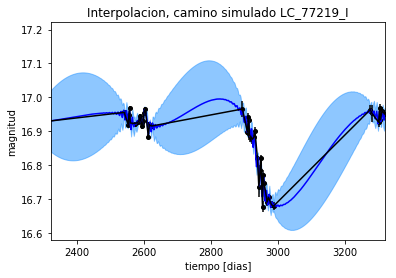

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_I')

Text(0.5,1,'Interpolacion, camino simulado LC_77219_I')

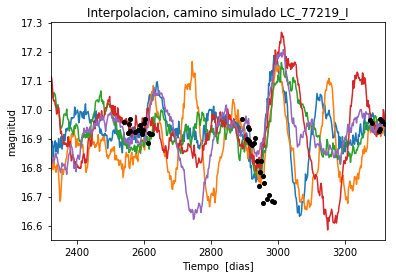

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1581.18757363
Median: 0.000517698380279
Standard deviation: 0.0381581115696
68% credibility interval: [ 0.00033914  0.0095653 ]
95% credibility interval: [ 0.00030857  0.03613762]
99% credibility interval: [ 0.00030363  0.23148051]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1743.9249754
Median: 0.000517698380279
Standard deviation: 0.0326659492952
68% credibility interval: [ 0.00033914  0.00951716]
95% credibility interval: [ 0.00030857  0.0357617 ]
99% credibility interval: [ 0.00030363  0.16815958]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 44.4774306751
Median: 0.239625518483
Standard deviation: 0.252195000257
68

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 124.800478312
Median: 127.313709356
Standard deviation: 1.96640262865
68% credibility interval: [ 125.35432275  128.73148456]
95% credibility interval: [ 122.02036164  129.66588872]
99% credibility interval: [ 119.84058942  129.87190553]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 37.1361909209
Median: 2.58743453914
Standard deviation: 2.8574541041
68% credibility interval: [ 1.35802838  5.56671885]
95% credibility interval: [  0.30745891  11.88233614]
99% credibility interval: [  0.07991582  13.02830631]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 573.588338539
Median: 58.8009429603
Standard deviation: 30.6407586304
68% credibility interval: [  1.03093185  73.14094132]
95% credibility interval: [  0.53812203

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3011.69734457
Median: 8.50283575453e-15
Standard deviation: 7.11420302137e+93
68% credibility interval: [  2.87200918e-32   7.22394298e-14]
95% credibility interval: [  6.57431128e-127   1.86765022e+001]
99% credibility interval: [  3.10082146e-130   1.97028524e+039]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 256.618645859
Median: 16.9142224586
Standard deviation: 0.0602569175584
68% credibility interval: [ 16.85418003  16.97517553]
95% credibility interval: [ 16.82324819  17.05140514]
99% credibility interval: [ 16.78827223  17.10033052]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 938.818981201
Median: 1.00246733498
Standard deviation: 0.378263665815
68% credibility interval: [ 0.12752726  1.00331759]
95% credibility interval: [ 0.11168122  1.0053641 ]
99% credibility interval: [ 0.10588666  1.00592383]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 938.818981201
Median: 1.00246733498
Standard deviation: 0.378263665815
68% credibility interval: [ 0.12752726  1.00331759]
95% credibility interval: [ 0.11168122  1.0053641 ]
99% credibility interval: [ 0.10588666  1.00592383]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 301.985830093
Median: 0.60313546263
Standard deviation: 0.35663839007
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 124.800478312
Median: 127.313709356
Standard deviation: 1.96640262865
68% credibility interval: [ 125.35432275  128.73148456]
95% credibility interval: [ 122.02036164  129.66588872]
99% credibility interval: [ 119.84058942  129.87190553]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 137.6852665
Median: 0.0221597529262
Standard deviation: 0.00936278653271
68% credibility interval: [ 0.0157757   0.03017728]
95% credibility interval: [ 0.01130908  0.04537178]
99% credibility interval: [ 0.00958229  0.05271854]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 349.644127998
Median: 1.15093350474
Standard deviation: 0.234803725363
68% credibility interval: [ 0.90885641  1.42055106]
95% credibility interval: [ 0.74189698  1.61488935]
99% credibility interval: [ 0.70186242  1.80757884]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 57.928589679
Median: 1.82824158909
Standard deviation: 2.00666883617
68% credibility interval: [ 0.01334579  3.95644605]
95% credibility interval: [  3.04325317e-04   7.42804217e+00]
99% credibility interval: [  5.32670447e-41   8.53975474e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1581.18757363
Median: (-0.00325279485652-6.30359846342j)
Standard deviation: 2.38876295717
68% credibility interval: [-0.06010056-2.74219115j -0.00213089-6.31553353j]
95% credibility interval: [-0.22705934-0.75886871j -0.00193880-6.30956101j]
99% credibility interval: [-1.45443495-4.08666116j -0.00190776-6.31690173j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1743.9249754
Median: (-0.00325279485652+6.30359846342j)
Standard deviation: 2.38554653273
68% credibility interval: [-0.05979807+0.76374639j -0.00213089+6.31553353j]
95% credibility interval: [-0.22469736+1.72789507j -0.00193880+6.30956101j]
99% credibility interval: [-1.05657783+3.44855156j -0.00190776+6.31690173j]
Posterior summary for parameter ar_roots  e